## Notebook for the prediction models

Now we will use our data to train predictions models. The aim is to predict whether the models can predict well if the player win or lose the play depending on their statistics.
I choosed to run 3 models and compare them to see which one is better for my case.

## 1. Librairy import

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, KFold
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import backend as K
from tqdm import tqdm

## 2. Random Forest

The first model I chose is a random forest.

### 2.1. Data loading

In [17]:
df = pd.read_csv("Final_Dataset_MVP.csv", sep=";")
display(df)

,color,player name,platform,player id,car id,car name,game duration,score,goals,saves,...,time defensive third,percentage defensive third,time neutral third,percentage neutral third,time offensive third,percentage offensive third,demos inflicted,demos taken,result,source_file
0,blue,hbccs,Epic,b2be6019e55b44c897eb1f3409cb19f4,4284,Fennec,427,1124,7,1,...,204.12,48.89,118.41,28.36,94.94,22.74,0,3,winner,01c429ee-cc80-4bb3-b17d-4003f6b49f65-players.csv
1,orange,Flowsen,Steam,76561197993140621,4284,Fennec,427,1197,6,3,...,184.11,43.16,136.12,31.91,106.37,24.93,3,0,loser,01c429ee-cc80-4bb3-b17d-4003f6b49f65-players.csv
2,blue,SC156,Epic,4e67f3631a834088a32924e3f82fc9ad,23,Octane,125,533,4,0,...,50.39,40.34,37.06,29.67,37.45,29.98,0,0,winner,02bac12b-dffe-49aa-a577-72063aa977b7-players.csv
3,orange,rodvvz,Epic,4a7a8d18b76647d8b8e71226ed03212b,4284,Fennec,125,52,0,0,...,57.12,45.89,43.83,35.21,23.53,18.90,0,0,loser,02bac12b-dffe-49aa-a577-72063aa977b7-players.csv
4,blue,Its_Bryz,Epic,0e56439a876144d6bc207e7e6cefc241,4284,Fennec,390,1061,5,3,...,173.98,44.63,113.03,29.00,102.79,26.37,1,0,winner,0350dbb7-096c-4bfd-9d18-34c727941d8f-players.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,orange,whomadejae,Epic,2c2d028a6a5e4e6ebded67294e973d76,4284,Fennec,175,304,1,1,...,94.98,55.05,60.14,34.86,17.41,10.09,0,1,loser,fdb3e9f2-bb64-4b15-beeb-8145a6c78bb1-players.csv
596,blue,PXRAN0IA,Epic,444f5f162b734876b256065c9415f063,4284,Fennec,392,1608,8,4,...,186.02,48.47,113.92,29.68,83.87,21.85,0,1,winner,feacdece-e326-4b0f-aa47-8e361043678e-players.csv
597,orange,Anthonyyy1_,Epic,0bf04ff18c86421b85e47c1d71802e84,4284,Fennec,392,952,5,2,...,178.51,45.98,119.99,30.91,89.72,23.11,1,0,loser,feacdece-e326-4b0f-aa47-8e361043678e-players.csv
598,blue,CrAcKpOwEr8140,XBox,7b3b4265fa010900,23,Octane,377,823,3,3,...,165.21,44.22,134.64,36.04,73.77,19.74,0,1,loser,fff5bfd4-ff93-4bf6-9bfd-440d9ba4c5a8-players.csv


### 2.2. Data manipulation

We clean the data by deleting the columns that can spoil the prediction such as "goals", "goals conceded", "score" and "goals conceded while last defender". We keep only numerical values, as they are the statistics of the players.

In [18]:
# We manipulate the data.

target_col = "result"
df[target_col] = df[target_col].map({"winner": 1, "loser": 0})

# We delete the spoiling columns and keep numerical values.

cols_to_drop = ["goals", "goals conceded", "score","goals conceded while last defender"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
X = df.select_dtypes(include=['number'])
y = df[target_col]
if target_col in X.columns:
    X = X.drop(columns=[target_col])


### 2.3. Train\Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 2.4. Training of the model

In [20]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

### 2.5. Model evaluation

Accuracy for the test set: 0.7833
Classification report :
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        58
           1       0.82      0.74      0.78        62

    accuracy                           0.78       120
   macro avg       0.79      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120



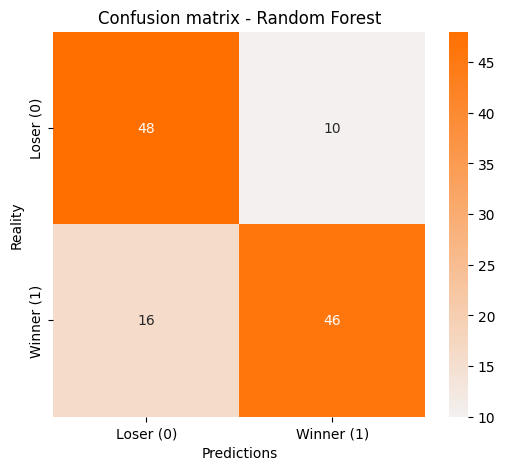

In [21]:
# Accuracy

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy for the test set: {acc:.4f}")
print("Classification report :")
print(classification_report(y_test, y_pred))

# Confusion matrix

plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap=sns.light_palette("#FF6F00DC", as_cmap=True), 
    xticklabels=["Loser (0)", "Winner (1)"],
    yticklabels=["Loser (0)", "Winner (1)"]
)
plt.title("Confusion matrix - Random Forest")
plt.xlabel("Predictions")
plt.ylabel("Reality")
plt.show()

We can see which are the statistics that are the best to predict if the player win or lose. 

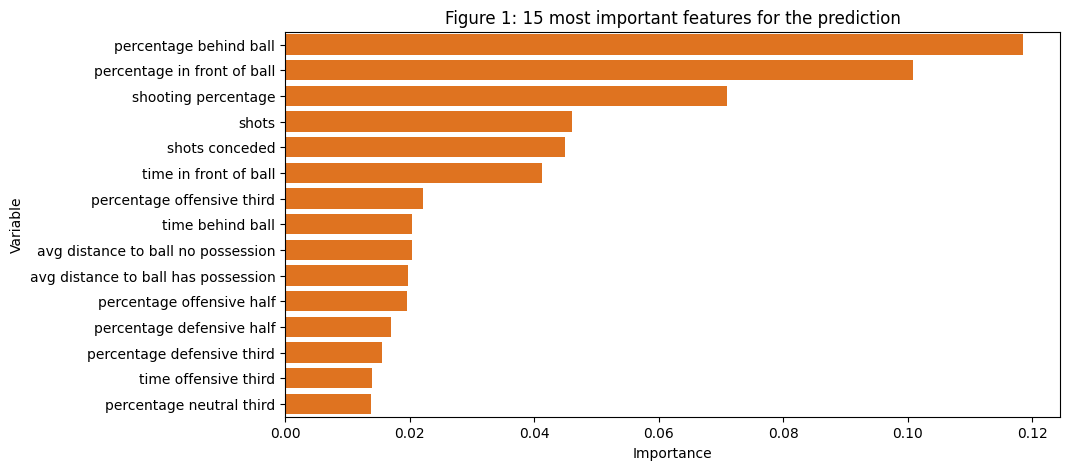

In [22]:
# Plot of the most important features.

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[:15], y=importances.index[:15], color="#FF6F00")
plt.title("Figure 1: 15 most important features for the prediction")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()

### 2.6. 6 folds cross-validation

To verify if the prediction can be used we do a 6 folds cross-validation on the model.

In [23]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

print(f"Results for Cross-Validation (6 folds) :")
for i, score in enumerate(cv_scores, 1):
    print(f" - Fold {i} : {score:.4f}")

print(f"Mean of the accuracy for the 6 folds: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


Results for Cross-Validation (6 folds) :
 - Fold 1 : 0.7900
 - Fold 2 : 0.8300
 - Fold 3 : 0.8900
 - Fold 4 : 0.7700
 - Fold 5 : 0.8500
 - Fold 6 : 0.7900
Mean of the accuracy for the 6 folds: 0.8200
Standard deviation: 0.0412


We can see that for the Random Forest the mean accuracy for the cross-validation is 0.82 making it a good predictor.

## 3. The neural network (MLP)

The second model I chose is a neural network with multiple hidden layers.

### 3.1. Data loading

In [24]:
df = pd.read_csv("Final_Dataset_MVP.csv", sep=";")
display(df)

,color,player name,platform,player id,car id,car name,game duration,score,goals,saves,...,time defensive third,percentage defensive third,time neutral third,percentage neutral third,time offensive third,percentage offensive third,demos inflicted,demos taken,result,source_file
0,blue,hbccs,Epic,b2be6019e55b44c897eb1f3409cb19f4,4284,Fennec,427,1124,7,1,...,204.12,48.89,118.41,28.36,94.94,22.74,0,3,winner,01c429ee-cc80-4bb3-b17d-4003f6b49f65-players.csv
1,orange,Flowsen,Steam,76561197993140621,4284,Fennec,427,1197,6,3,...,184.11,43.16,136.12,31.91,106.37,24.93,3,0,loser,01c429ee-cc80-4bb3-b17d-4003f6b49f65-players.csv
2,blue,SC156,Epic,4e67f3631a834088a32924e3f82fc9ad,23,Octane,125,533,4,0,...,50.39,40.34,37.06,29.67,37.45,29.98,0,0,winner,02bac12b-dffe-49aa-a577-72063aa977b7-players.csv
3,orange,rodvvz,Epic,4a7a8d18b76647d8b8e71226ed03212b,4284,Fennec,125,52,0,0,...,57.12,45.89,43.83,35.21,23.53,18.90,0,0,loser,02bac12b-dffe-49aa-a577-72063aa977b7-players.csv
4,blue,Its_Bryz,Epic,0e56439a876144d6bc207e7e6cefc241,4284,Fennec,390,1061,5,3,...,173.98,44.63,113.03,29.00,102.79,26.37,1,0,winner,0350dbb7-096c-4bfd-9d18-34c727941d8f-players.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,orange,whomadejae,Epic,2c2d028a6a5e4e6ebded67294e973d76,4284,Fennec,175,304,1,1,...,94.98,55.05,60.14,34.86,17.41,10.09,0,1,loser,fdb3e9f2-bb64-4b15-beeb-8145a6c78bb1-players.csv
596,blue,PXRAN0IA,Epic,444f5f162b734876b256065c9415f063,4284,Fennec,392,1608,8,4,...,186.02,48.47,113.92,29.68,83.87,21.85,0,1,winner,feacdece-e326-4b0f-aa47-8e361043678e-players.csv
597,orange,Anthonyyy1_,Epic,0bf04ff18c86421b85e47c1d71802e84,4284,Fennec,392,952,5,2,...,178.51,45.98,119.99,30.91,89.72,23.11,1,0,loser,feacdece-e326-4b0f-aa47-8e361043678e-players.csv
598,blue,CrAcKpOwEr8140,XBox,7b3b4265fa010900,23,Octane,377,823,3,3,...,165.21,44.22,134.64,36.04,73.77,19.74,0,1,loser,fff5bfd4-ff93-4bf6-9bfd-440d9ba4c5a8-players.csv


### 3.2. Data manipulation

In [25]:
# We do the same thing the columns as previously.

target_col = "result"
df[target_col] = df[target_col].map({"winner": 1, "loser": 0})
cols_to_drop = ["goals", "goals conceded", "score","goals conceded while last defender"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
X = df.select_dtypes(include=['number'])
y = df[target_col]
if target_col in X.columns:
    X = X.drop(columns=[target_col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.3. Train\Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### 3.4. Training the model

In [27]:
# The Neural network

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=16,
    verbose=0
)

c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3.5. Model evaluation

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy for the neural network : 0.8083


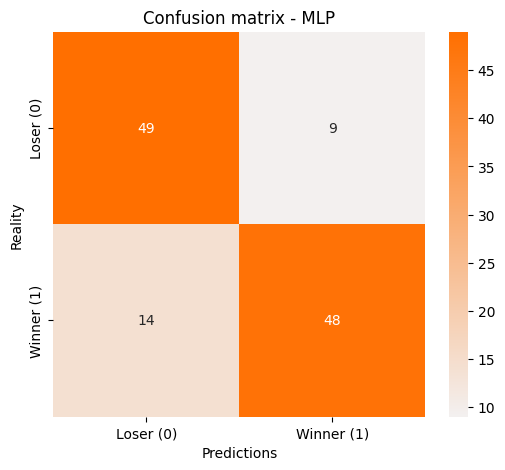

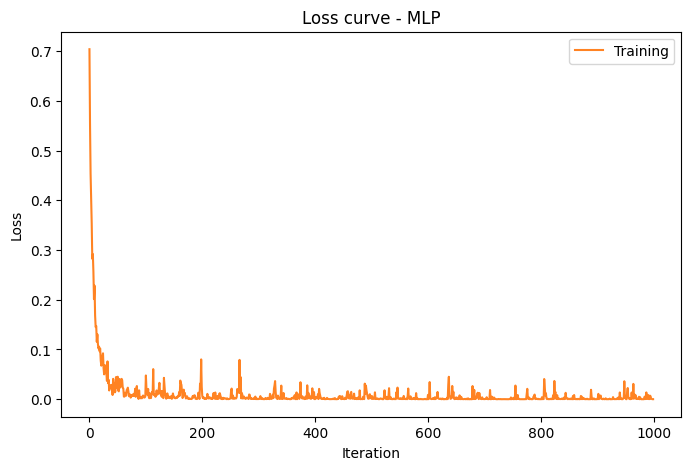

In [29]:
# Accuracy

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy for the neural network : {acc:.4f}")

# Confusion Matrix

plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap=sns.light_palette("#FF6F00DC", as_cmap=True), 
    xticklabels=["Loser (0)", "Winner (1)"],
    yticklabels=["Loser (0)", "Winner (1)"]
)
plt.title("Confusion matrix - MLP")
plt.xlabel("Predictions")
plt.ylabel("Reality")
plt.show()

# Loss curve

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training', color="#FF6F00DC")
plt.title("Loss curve - MLP")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 3.6. 6 folds cross-validation

To verify if the prediction can be used we do a 6 folds cross-validation on the model.

In [30]:
def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X.shape[1]),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=build_model, epochs=100, batch_size=16, verbose=0)

kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_results = []

for train_idx, test_idx in kfold.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_idx], X_scaled[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    estimator.fit(X_train_fold, y_train_fold)
    scores = estimator.score(X_test_fold, y_test_fold)
    cv_results.append(scores)

print("Results for 6 folds cross-validation:")
for i, score in enumerate(cv_results, 1):
    print(f" - Fold {i} : {score:.4f}")

print(f"Mean of the accuracy for the 6 folds : {np.mean(cv_results):.4f}")
print(f"Standard deviation : {np.std(cv_results):.4f}")

c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\

c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\

Results for 6 folds cross-validation:
 - Fold 1 : 0.8300
 - Fold 2 : 0.8900
 - Fold 3 : 0.8900
 - Fold 4 : 0.9200
 - Fold 5 : 0.8800
 - Fold 6 : 0.8500
Mean of the accuracy for the 6 folds : 0.8767
Standard deviation : 0.0292


For this neural network the mean of the accuracy is 0.8767 for the 6 folds cross-validation. It has a better mean than the random forest, wa can assume that it is a better model for our case.

## 4. Neural network funnel method

For the third model I chose a neural network but I used the method of the funnel; putting less neurone in each hidden layer making it like a funnel.

### 4.1. Data loading

In [31]:
df = pd.read_csv("Final_Dataset_MVP.csv", sep=";")
display(df)


,color,player name,platform,player id,car id,car name,game duration,score,goals,saves,...,time defensive third,percentage defensive third,time neutral third,percentage neutral third,time offensive third,percentage offensive third,demos inflicted,demos taken,result,source_file
0,blue,hbccs,Epic,b2be6019e55b44c897eb1f3409cb19f4,4284,Fennec,427,1124,7,1,...,204.12,48.89,118.41,28.36,94.94,22.74,0,3,winner,01c429ee-cc80-4bb3-b17d-4003f6b49f65-players.csv
1,orange,Flowsen,Steam,76561197993140621,4284,Fennec,427,1197,6,3,...,184.11,43.16,136.12,31.91,106.37,24.93,3,0,loser,01c429ee-cc80-4bb3-b17d-4003f6b49f65-players.csv
2,blue,SC156,Epic,4e67f3631a834088a32924e3f82fc9ad,23,Octane,125,533,4,0,...,50.39,40.34,37.06,29.67,37.45,29.98,0,0,winner,02bac12b-dffe-49aa-a577-72063aa977b7-players.csv
3,orange,rodvvz,Epic,4a7a8d18b76647d8b8e71226ed03212b,4284,Fennec,125,52,0,0,...,57.12,45.89,43.83,35.21,23.53,18.90,0,0,loser,02bac12b-dffe-49aa-a577-72063aa977b7-players.csv
4,blue,Its_Bryz,Epic,0e56439a876144d6bc207e7e6cefc241,4284,Fennec,390,1061,5,3,...,173.98,44.63,113.03,29.00,102.79,26.37,1,0,winner,0350dbb7-096c-4bfd-9d18-34c727941d8f-players.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,orange,whomadejae,Epic,2c2d028a6a5e4e6ebded67294e973d76,4284,Fennec,175,304,1,1,...,94.98,55.05,60.14,34.86,17.41,10.09,0,1,loser,fdb3e9f2-bb64-4b15-beeb-8145a6c78bb1-players.csv
596,blue,PXRAN0IA,Epic,444f5f162b734876b256065c9415f063,4284,Fennec,392,1608,8,4,...,186.02,48.47,113.92,29.68,83.87,21.85,0,1,winner,feacdece-e326-4b0f-aa47-8e361043678e-players.csv
597,orange,Anthonyyy1_,Epic,0bf04ff18c86421b85e47c1d71802e84,4284,Fennec,392,952,5,2,...,178.51,45.98,119.99,30.91,89.72,23.11,1,0,loser,feacdece-e326-4b0f-aa47-8e361043678e-players.csv
598,blue,CrAcKpOwEr8140,XBox,7b3b4265fa010900,23,Octane,377,823,3,3,...,165.21,44.22,134.64,36.04,73.77,19.74,0,1,loser,fff5bfd4-ff93-4bf6-9bfd-440d9ba4c5a8-players.csv


### 4.2. Data manipulation

In [32]:
# We do the same thing with the columns as previously.

target_col = "result"
df[target_col] = df[target_col].map({"winner": 1, "loser": 0})
cols_to_drop = ["goals", "goals conceded", "score","goals conceded while last defender"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
X = df.select_dtypes(include=['number'])
y = df[target_col]
if target_col in X.columns:
    X = X.drop(columns=[target_col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4.3. Train\Test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### 4.4. Training the model

In [34]:
# Funnel neural network

model_entonnoir = Sequential([
    Dense(512, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model_entonnoir.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training

history_entonnoir = model_entonnoir.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=16,
    verbose=0
)

c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4.5. Model evaluation

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy for the funnel neural network : 0.8083


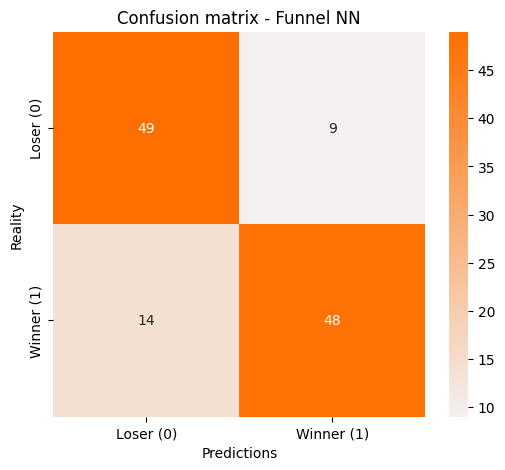

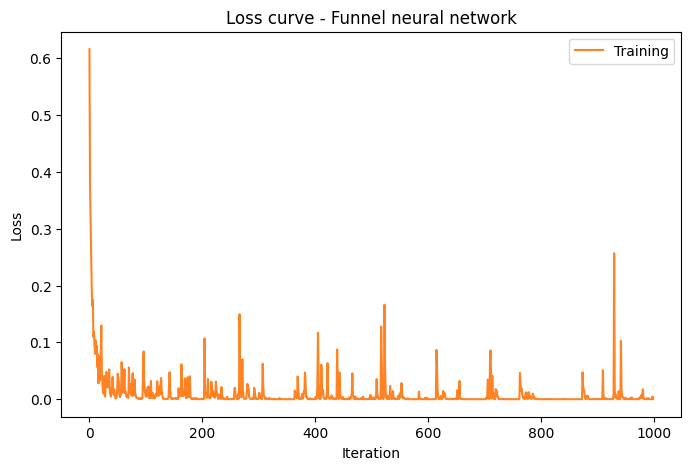

In [35]:
# Accuracy

y_pred_prob = model_entonnoir.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy for the funnel neural network : {acc:.4f}")

# Confusion matrix

plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap=sns.light_palette("#FF6F00DC", as_cmap=True), 
    xticklabels=["Loser (0)", "Winner (1)"],
    yticklabels=["Loser (0)", "Winner (1)"]
)
plt.title("Confusion matrix - Funnel NN")
plt.xlabel("Predictions")
plt.ylabel("Reality")
plt.show()

# Loss curve

plt.figure(figsize=(8,5))
plt.plot(history_entonnoir.history['loss'], label='Training', color="#FF6F00DC")
plt.title("Loss curve - Funnel neural network")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()


### 4.6. 6 folds cross-validation

To verify if the prediction can be used we do a 6 folds cross-validation on the model.

In [36]:
def build_model_entonnoir(input_dim):
    model = Sequential([
        Dense(512, activation='relu', input_dim=input_dim),
        Dropout(0.4),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

kf = KFold(n_splits=6, shuffle=True, random_state=42)
accuracies_cv = []

for fold, (train_idx, test_idx) in enumerate(tqdm(kf.split(X_scaled), total=6)):
    X_train_cv, X_test_cv = X_scaled[train_idx], X_scaled[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    model_cv = build_model_entonnoir(X_train_cv.shape[1])

    history_cv = model_cv.fit(
        X_train_cv, y_train_cv,
        validation_split=0.2,
        epochs=200,
        batch_size=16,
        verbose=0
    )

    y_pred_cv = (model_cv.predict(X_test_cv) > 0.5).astype(int)
    acc_cv = accuracy_score(y_test_cv, y_pred_cv)
    accuracies_cv.append(acc_cv)
    print(f"Fold {fold+1} - Accuracy: {acc_cv:.4f}")

    K.clear_session()

print(f"Mean of the accuracy for the 6 folds: {np.mean(accuracies_cv):.4f}")
print(f"Standard deviation : {np.std(accuracies_cv):.4f}")

  0%|          | 0/6 [00:00<?, ?it/s]c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 1 - Accuracy: 0.9000



 17%|█▋        | 1/6 [00:27<02:18, 27.65s/it]c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fold 2 - Accuracy: 0.8500


 33%|███▎      | 2/6 [00:53<01:46, 26.64s/it]c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 3 - Accuracy: 0.8800


 50%|█████     | 3/6 [01:20<01:20, 26.96s/it]c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fold 4 - Accuracy: 0.8700


 67%|██████▋   | 4/6 [01:49<00:55, 27.65s/it]c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 5 - Accuracy: 0.8300


 83%|████████▎ | 5/6 [02:16<00:27, 27.25s/it]c:\Users\Yacine\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 6 - Accuracy: 0.8900


100%|██████████| 6/6 [02:42<00:00, 27.15s/it]

Mean of the accuracy for the 6 folds: 0.8700
Standard deviation : 0.0238


Finally for this neural network we can see that the mean accuracy for the cross-validation is 0.87 the same as the neural network making them approximately both as good as the other. Both are better models than the random forest for our case. And that's all for my MVP.
After that we need to apply the models to a larger dataset.